#### Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

#### The file ex1data1.txt contains the dataset. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative profit indicates a loss. 

## 1. Plotting the data

In [3]:
# importing the file

import pandas as pd
import numpy as np

data = pd.read_table('ex1data1.txt', header = None, sep=',')
data.reset_index(drop=True, inplace = True)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
population = data.iloc[:,0]      # population column
profit = data.iloc[:,1]          # profit column
m = len(population)              # number of training examples

x_ = population.to_numpy().reshape(m,1)
y = profit.to_numpy().reshape(m,1)

x_
x_.shape
type(x_)

numpy.ndarray

Text(0.5, 0, 'Population of the City in 10,000')

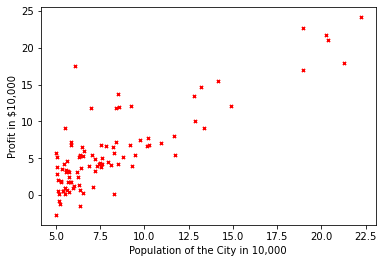

In [5]:
# plotting x and y

import matplotlib.pyplot as plt
plt.scatter(x_,y, marker ='x', color ='red', s=10)
plt.ylabel('Profit in $10,000')
plt.xlabel("Population of the City in 10,000")

## 2. Gradient Descent

#### The objective of linear regression is to minimize the cost function given by 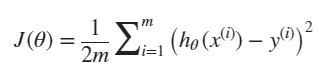
#### where the hypothesis h_theta(x) is given by the linear model: 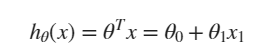

#### Let's use batch gradient descent to adjust theta values to minimize the cost function. Here, each iteration performs the update: 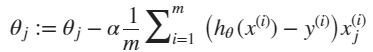


In [6]:
# adding a column of 1 to array x for theta0.
x = np.concatenate((np.ones((m,1)), x_), axis = 1)
x.shape

# initialize the first fitting parameter: both 0
theta_start = np.zeros((2,1))

iteration = 1500

# learning rate
alpha = 0.01  

In [7]:
# function to calculate the cost J while we perform the gradient descent

def J(x,y,theta):
    m = len(y)
    x_prime = np.transpose(x)
    theta_prime = np.transpose(theta)
    y_prime = np.transpose(y)
    
    value = np.sum(np.power(np.dot(theta_prime, x_prime) - y_prime,2))
    J = value/ (2 * m)
    return J

In [8]:
# testing the J function with our current x, y, theta(0,0) and m(=97)
J (x,y,theta_start)

32.072733877455676

In [25]:
# with different theta values(-1 for theta0 and 2 for theta1)
J(x,y,[-1, 2])

54.24245508201238

In [9]:
# function for Gradient Descent
# will take in the values of initial theta, the training data set, learning rate and number of iterations
# and updates theta by taking gradient steps 

def gradient_des(x,y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters,1)) # a 2D 0 array
    x_prime = np.transpose(x)
    y_prime = np.transpose(y)
    
    for i in range(num_iters):
        # perform a single gradient step on the parameter vector theta
        theta_p = np.transpose(theta)
        
        term1 = np.dot(theta_p, x_prime) - y_prime
        term2 = np.dot(term1, x)
        term3 = np.transpose(term2)
        #derivative_term =  np.transpose(np.dot(, x))
        theta = theta - (alpha/m) * term3
        
        # record each cost for each iteration 
        J_history[i] = J(x,y,theta)
        print("Theta = {}, J = {}, for iteration {}".format(theta, J_history[i],i))
    return theta

In [10]:
# let's run Gradient Descent now

theta = np.array(gradient_des(x,y,theta_start,alpha,iteration))
print("Theta computed from gradient descent: {}, {}".format(theta[0], theta[1]))

Theta = [[0.05839135]
 [0.6532885 ]], J = [6.73719046], for iteration 0
Theta = [[0.06289175]
 [0.77000978]], J = [5.93159357], for iteration 1
Theta = [[0.05782293]
 [0.79134812]], J = [5.90115471], for iteration 2
Theta = [[0.05106363]
 [0.79572981]], J = [5.89522859], for iteration 3
Theta = [[0.04401438]
 [0.79709618]], J = [5.89009494], for iteration 4
Theta = [[0.03692413]
 [0.79792547]], J = [5.88500416], for iteration 5
Theta = [[0.02983712]
 [0.79865824]], J = [5.87993248], for iteration 6
Theta = [[0.02276118]
 [0.79937279]], J = [5.87487909], for iteration 7
Theta = [[0.0156977 ]
 [0.80008305]], J = [5.86984391], for iteration 8
Theta = [[0.0086469]
 [0.8007915]], J = [5.86482687], for iteration 9
Theta = [[0.00160879]
 [0.80149857]], J = [5.85982789], for iteration 10
Theta = [[-0.00541662]
 [ 0.80220436]], J = [5.85484692], for iteration 11
Theta = [[-0.01242938]
 [ 0.80290886]], J = [5.84988389], for iteration 12
Theta = [[-0.01942949]
 [ 0.8036121 ]], J = [5.84493874], f

Theta = [[-1.98475703]
 [ 1.00105057]], J = [4.80944843], for iteration 405
Theta = [[-1.98820183]
 [ 1.00139664]], J = [4.80825086], for iteration 406
Theta = [[-1.99164043]
 [ 1.00174208]], J = [4.80705761], for iteration 407
Theta = [[-1.99507282]
 [ 1.0020869 ]], J = [4.80586866], for iteration 408
Theta = [[-1.99849903]
 [ 1.0024311 ]], J = [4.80468399], for iteration 409
Theta = [[-2.00191906]
 [ 1.00277468]], J = [4.80350359], for iteration 410
Theta = [[-2.00533293]
 [ 1.00311764]], J = [4.80232744], for iteration 411
Theta = [[-2.00874064]
 [ 1.00345998]], J = [4.80115553], for iteration 412
Theta = [[-2.01214221]
 [ 1.00380171]], J = [4.79998784], for iteration 413
Theta = [[-2.01553765]
 [ 1.00414282]], J = [4.79882435], for iteration 414
Theta = [[-2.01892697]
 [ 1.00448331]], J = [4.79766505], for iteration 415
Theta = [[-2.02231018]
 [ 1.00482319]], J = [4.79650993], for iteration 416
Theta = [[-2.02568729]
 [ 1.00516246]], J = [4.79535897], for iteration 417
Theta = [[-2

Theta = [[-2.90840677]
 [ 1.0938412 ]], J = [4.5657264], for iteration 771
Theta = [[-2.9101866 ]
 [ 1.09402001]], J = [4.56540671], for iteration 772
Theta = [[-2.91196323]
 [ 1.09419849]], J = [4.56508817], for iteration 773
Theta = [[-2.91373666]
 [ 1.09437665]], J = [4.56477078], for iteration 774
Theta = [[-2.91550689]
 [ 1.09455449]], J = [4.56445453], for iteration 775
Theta = [[-2.91727392]
 [ 1.09473201]], J = [4.56413942], for iteration 776
Theta = [[-2.91903778]
 [ 1.0949092 ]], J = [4.56382544], for iteration 777
Theta = [[-2.92079845]
 [ 1.09508608]], J = [4.5635126], for iteration 778
Theta = [[-2.92255595]
 [ 1.09526264]], J = [4.56320088], for iteration 779
Theta = [[-2.92431028]
 [ 1.09543889]], J = [4.56289029], for iteration 780
Theta = [[-2.92606145]
 [ 1.09561481]], J = [4.56258082], for iteration 781
Theta = [[-2.92780946]
 [ 1.09579042]], J = [4.56227246], for iteration 782
Theta = [[-2.92955432]
 [ 1.09596571]], J = [4.56196521], for iteration 783
Theta = [[-2.9

Theta = [[-3.44208408]
 [ 1.14745488]], J = [4.495711], for iteration 1202
Theta = [[-3.44290191]
 [ 1.14753704]], J = [4.4956435], for iteration 1203
Theta = [[-3.44371827]
 [ 1.14761905]], J = [4.49557625], for iteration 1204
Theta = [[-3.44453316]
 [ 1.14770092]], J = [4.49550923], for iteration 1205
Theta = [[-3.44534657]
 [ 1.14778263]], J = [4.49544246], for iteration 1206
Theta = [[-3.44615852]
 [ 1.1478642 ]], J = [4.49537593], for iteration 1207
Theta = [[-3.44696901]
 [ 1.14794562]], J = [4.49530964], for iteration 1208
Theta = [[-3.44777804]
 [ 1.1480269 ]], J = [4.49524358], for iteration 1209
Theta = [[-3.44858561]
 [ 1.14810803]], J = [4.49517777], for iteration 1210
Theta = [[-3.44939172]
 [ 1.14818901]], J = [4.49511219], for iteration 1211
Theta = [[-3.45019638]
 [ 1.14826985]], J = [4.49504685], for iteration 1212
Theta = [[-3.45099959]
 [ 1.14835054]], J = [4.49498174], for iteration 1213
Theta = [[-3.45180135]
 [ 1.14843108]], J = [4.49491687], for iteration 1214
Th

Theta = [[-3.61349548]
 [ 1.16467501]], J = [4.48422586], for iteration 1465
Theta = [[-3.61400432]
 [ 1.16472613]], J = [4.48419973], for iteration 1466
Theta = [[-3.61451225]
 [ 1.16477716]], J = [4.48417369], for iteration 1467
Theta = [[-3.61501927]
 [ 1.16482809]], J = [4.48414775], for iteration 1468
Theta = [[-3.61552536]
 [ 1.16487894]], J = [4.4841219], for iteration 1469
Theta = [[-3.61603055]
 [ 1.16492969]], J = [4.48409614], for iteration 1470
Theta = [[-3.61653483]
 [ 1.16498035]], J = [4.48407048], for iteration 1471
Theta = [[-3.6170382 ]
 [ 1.16503092]], J = [4.48404491], for iteration 1472
Theta = [[-3.61754066]
 [ 1.1650814 ]], J = [4.48401943], for iteration 1473
Theta = [[-3.61804221]
 [ 1.16513178]], J = [4.48399404], for iteration 1474
Theta = [[-3.61854286]
 [ 1.16518208]], J = [4.48396875], for iteration 1475
Theta = [[-3.61904261]
 [ 1.16523228]], J = [4.48394354], for iteration 1476
Theta = [[-3.61954146]
 [ 1.1652824 ]], J = [4.48391843], for iteration 1477


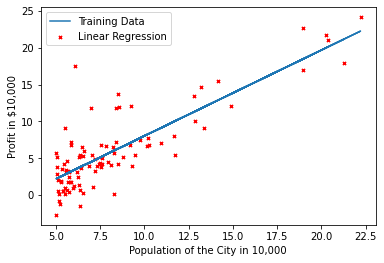

In [11]:
plt.scatter(x_,y, marker ='x', color ='red', s=10)
plt.ylabel('Profit in $10,000')
plt.xlabel("Population of the City in 10,000")

plt.plot(x[:,1], np.dot(x,theta), '-')

plt.legend(['Training Data', 'Linear Regression'])

In [12]:
# Prediction of the profit for a city with population of 35000

input1 = np.array([[1,3.5]])
predict1 = float(np.dot(input1, theta))
print("For population of 35k, the predicted profit is {}".format(predict1 * 10000))

For population of 35k, the predicted profit is 4519.7678677017675


## 3. Visualizing J(theta)

In [13]:
# values of theta over which we will calculate J
theta0 = np.linspace(-10,10,100)
theta1 = np.linspace(-1,4,100)

# initialize J to a matrix of 0. 2D array.
J_values = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = [theta0[i], theta1[j]]
        J_values[i,j] = J(x,y,t)

In [20]:
J_values

array([[328.09290555, 316.6648683 , 305.44447299, ..., 186.35412584,
        195.06735595, 203.98822799],
       [323.26504192, 311.92025945, 300.7831189 , ..., 189.60197489,
        198.39845977, 207.40258658],
       [318.47799046, 307.21646275, 296.16257698, ..., 192.89063611,
        201.77037576, 210.85775734],
       ...,
       [ 49.81156018,  46.45923561,  43.31455298, ..., 691.41691065,
        708.20585345, 725.20243817],
       [ 48.94247627,  45.67340647,  42.61197861, ..., 698.62353943,
        715.49573699, 732.57557648],
       [ 48.11420452,  44.9283895 ,  41.95021641, ..., 705.87098036,
        722.82643269, 739.98952696]])

Text(0.5, 0, 'theta1')

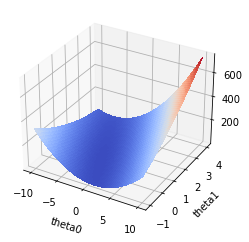

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# values of theta over which we will calculate J
theta0 = np.linspace(-10,10,100)
theta1 = np.linspace(-1,4,100)

X, Y = np.meshgrid(theta0, theta1)

Z = np.zeros((len(theta0), len(theta1)))
for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = [theta0[i], theta1[j]]
        Z[i,j] = J(x,y,t)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('theta0')
plt.ylabel('theta1')


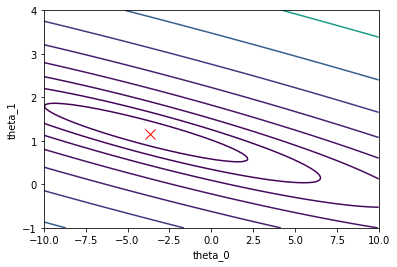

In [49]:
X, Y = np.meshgrid(theta0, theta1)
plt.contour(X,Y,np.transpose(Z), np.logspace(-2,3,20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.plot(theta[0], theta[1], 'rx', markersize= 10, linewidth= 2)